# 이변량_숫자 vs 숫자

* 우리가 사용하는 도구는...
    * 두 변수와의 관계를 살펴보기 위해, 두가지 도구(시각화, 수치화)를 이용합니다.
    * 이 도구들도 각각 한계가 있습니다. 보이는게 전부가 아님을 꼭 명심하세요! 
    * 특히 수치화 도구(가설검정 도구)는 많은 가정들이 전제 됩니다. 
    * 그래서 이번 과정에서는 그 도구를 사용하는 데에 집중합니다. 


## 1.환경준비

* 라이브러리 불러오기

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 뉴욕 공기 오염도


In [20]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
# air['Month'] = air.Date.dt.month
# air['Weekday'] = air.Date.dt.weekday
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


----

## 2.함수들

### (1)데이터프레임 전체 상관계수 구하고, 강한/약한 관계 찾기

In [22]:
# 데이터프레임 전체 상관계수 구하고, 강한/약한 관계 찾기
def df_corr(data) :

    # 전체 상관계수 만들기(자기자신, 중복부분 NaN 처리)
    temp = data.corr()
    mask = np.zeros_like(temp)
    mask[np.triu_indices_from(mask)] = True
    mask = np.where(mask == 1, 0, 1)
    result = mask * temp
    result = result[result != 0]

    print('\n 전체 상관관계')
    display(result)
    # 시각화
    # plt.figure(figsize = (15,12))
    # sns.heatmap(result, annot = True)
    # plt.show()

    # 강한/약한 상관관계 조회
    temp2 = np.abs(result)
    col = len(list(temp2))
    
    # 가장 강한 상관계수
    idx = np.nanargmax(temp2)
    i, c = idx // col, idx % col 
    print('\n 가장 강한 상관관계')
    display(result.iloc[i:i+1,c:c+1])

    idx = np.nanargmin(temp2)
    i, c = idx // col, idx % col 
    print('\n 가장 약한 상관관계')
    display(result.iloc[i:i+1,c:c+1])

In [23]:
df_corr(air)


 전체 상관관계


,Ozone,Solar.R,Wind,Temp
Ozone,NaN,NaN,NaN,NaN
Solar.R,0.280068,NaN,NaN,NaN
Wind,-0.605478,-0.056792,NaN,NaN
Temp,0.683372,0.275840,-0.457988,NaN



 가장 강한 상관관계


,Ozone
Temp,0.683372



 가장 약한 상관관계


,Solar.R
Wind,-0.056792


In [24]:
df_corr(titanic)


 전체 상관관계


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Survived,-0.005007,NaN,NaN,NaN,NaN,NaN,NaN
Pclass,-0.035144,-0.338481,NaN,NaN,NaN,NaN,NaN
Age,0.036847,-0.077221,-0.369226,NaN,NaN,NaN,NaN
SibSp,-0.057527,-0.035322,0.083081,-0.308247,NaN,NaN,NaN
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,NaN,NaN
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,NaN



 가장 강한 상관관계


,Pclass
Fare,-0.5495



 가장 약한 상관관계


,PassengerId
Parch,-0.001652


### (2)숫자형 변수에 대한 단변량 분석 함수

In [25]:
# 숫자형 변수에 대한 단변량 분석 함수
def eda_1_n(data, var, bins = 30) :
    # 기초 통계량
    display(data[[var]].describe().T)

    # 시각화
    plt.figure(figsize = (12,8))
    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()
    plt.show()

,count,mean,std,min,25%,50%,75%,max
Temp,153.0,77.882353,9.46527,56.0,72.0,79.0,85.0,97.0


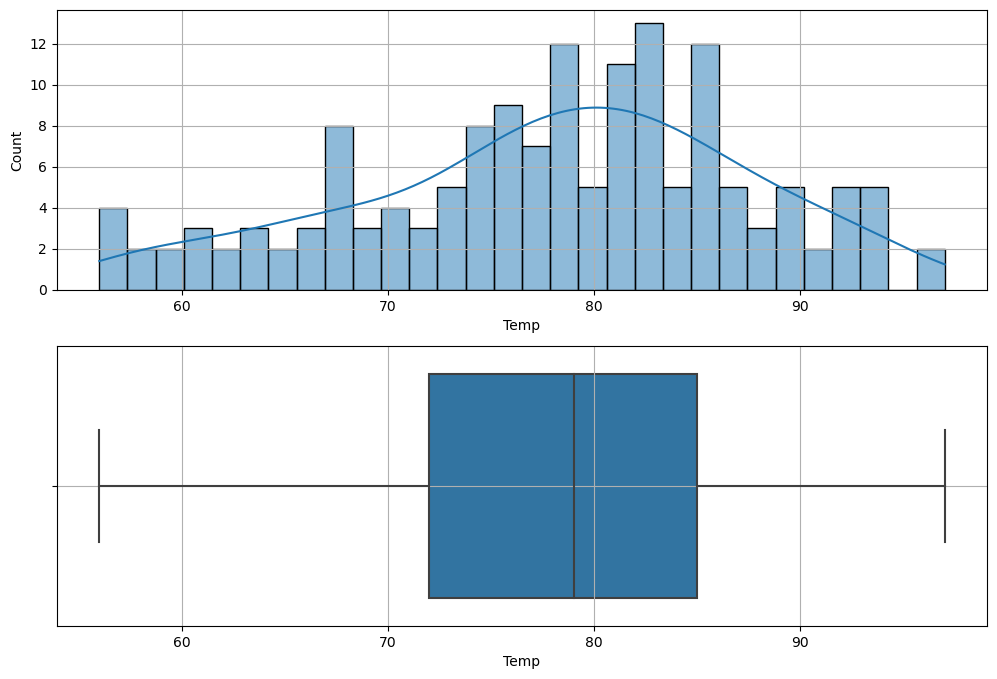

In [26]:
eda_1_n(air, 'Temp')

### (3) 범주형 변수에 대한 단변량 분석 함수

In [27]:
# 범주형 변수에 대한 단변량 분석 함수
def eda_1_c(data, var) :
    # 기초 통계량
    print(f'<<< {var} >>>')
    cnt = data[var].value_counts() # 범주별 빈도수
    prop = data[var].value_counts()/data.shape[0] # 범주별 비율
    temp = pd.DataFrame({'Class':cnt.index, 'Count':cnt.values, 'Prop':prop.values})
    display(temp)

    # 시각화
    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

<<< Survived >>>


,Class,Count,Prop
0,0,549,0.616162
1,1,342,0.383838


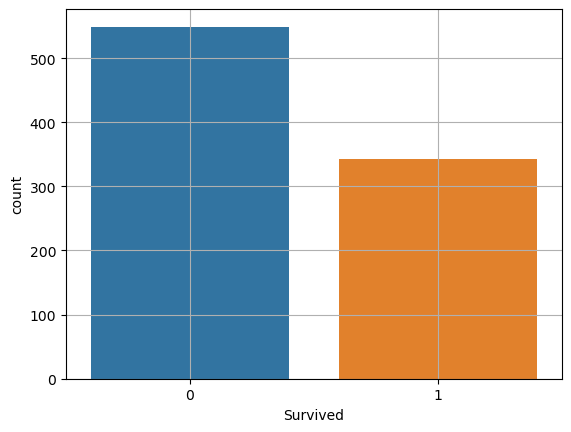

In [28]:
eda_1_c(titanic, 'Survived')

### (4) 이변량 숫자 --> 숫자

In [29]:
def eda_2_nn(data, target, feature):
    
    # 혹시나 NaN 있으면 제외시키기
    temp = data.loc[data[feature].notnull()]
    
    sns.scatterplot(x=feature, y = target, data = temp)
    plt.show()
    
    result = spst.pearsonr(temp[feature], temp[target])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')

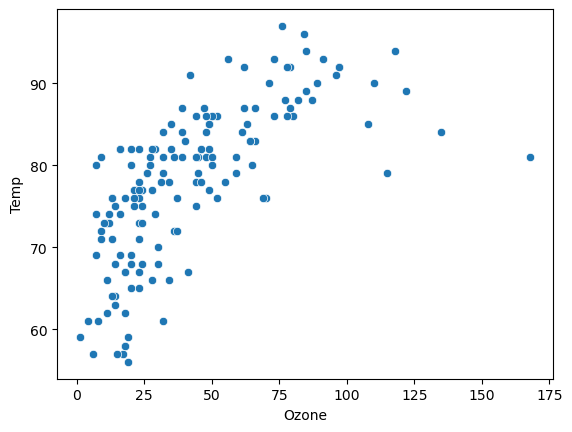

상관계수 : 0.6833717861490116, p-value : 2.1977698002001775e-22


In [30]:
eda_2_nn(air, 'Temp', 'Ozone')

### (5) 이변량 범주 --> 범주

In [11]:
def eda_2_cc(data, target, feature) : 
    mosaic(data, [ feature,target])
    plt.axhline(1- data[target].mean(), color = 'r')
    plt.show()

    # 먼저 집계
    table = pd.crosstab(data[target], data[feature])
    print('교차표\n', table)
    print('-' * 100)

# 카이제곱검정
    result = spst.chi2_contingency(table)
    print('카이제곱통계량', result[0])
    print('p-value', result[1])


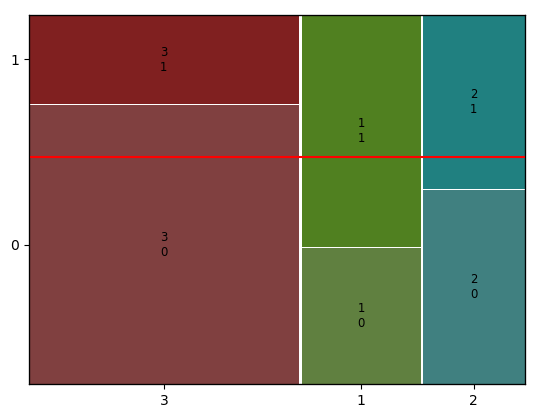

교차표
 Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
----------------------------------------------------------------------------------------------------
카이제곱통계량 102.88898875696056
p-value 4.549251711298793e-23


In [31]:
eda_2_cc(titanic, 'Survived', 'Pclass')